In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn import metrics

In [6]:
df = pd.read_csv('P3_Weather.csv')

/home/naveen/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

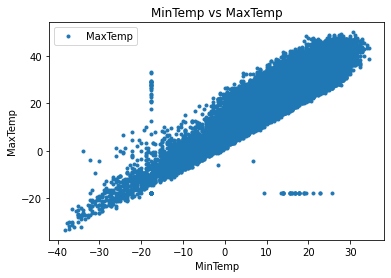

In [21]:
df.plot(x='MinTemp', y='MaxTemp', style='.')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

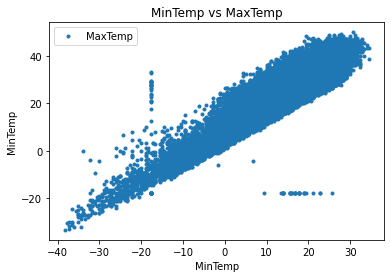

In [22]:
df.plot(x ='MinTemp', y='MaxTemp', style='.')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MinTemp')
plt.show()

In [23]:
df['MinTemp']

0         22.222222
1         21.666667
2         22.222222
3         22.222222
4         21.666667
            ...    
119035    18.333333
119036    18.333333
119037    18.333333
119038    18.333333
119039    17.222222
Name: MinTemp, Length: 119040, dtype: float64

In [24]:
x = df['MinTemp'].values.reshape(-1,1)

In [25]:
x

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [18.33333333],
       [18.33333333],
       [17.22222222]])

In [26]:
df['MaxTemp']

0         25.555556
1         28.888889
2         26.111111
3         26.666667
4         26.666667
            ...    
119035    28.333333
119036    29.444444
119037    28.333333
119038    28.333333
119039    29.444444
Name: MaxTemp, Length: 119040, dtype: float64

In [27]:
y = df['MaxTemp'].values.reshape(-1,1)

In [28]:
y

array([[25.55555556],
       [28.88888889],
       [26.11111111],
       ...,
       [28.33333333],
       [28.33333333],
       [29.44444444]])

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y , test_size = 0.2, random_state =0)

In [32]:
xtrain.shape

(95232, 1)

In [33]:
xtest.shape

(23808, 1)

In [34]:
regressor = LinearRegression()

In [35]:
regressor.fit(xtrain, ytrain)

LinearRegression()

In [38]:
li=[]
for i in range(100):
    li.append(regressor.predict([[0]])[0][0])
print(li)

[10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572, 10.661852008653572,

In [39]:
print(regressor.intercept_)

[10.66185201]


In [40]:
print(regressor.coef_)

[[0.92033997]]


In [41]:
ypred = regressor.predict(xtest)


In [43]:
df1 = pd.DataFrame({'actual': ytest.flatten(),
                   'predict': ypred.flatten()})

In [44]:
df1

,actual,predict
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


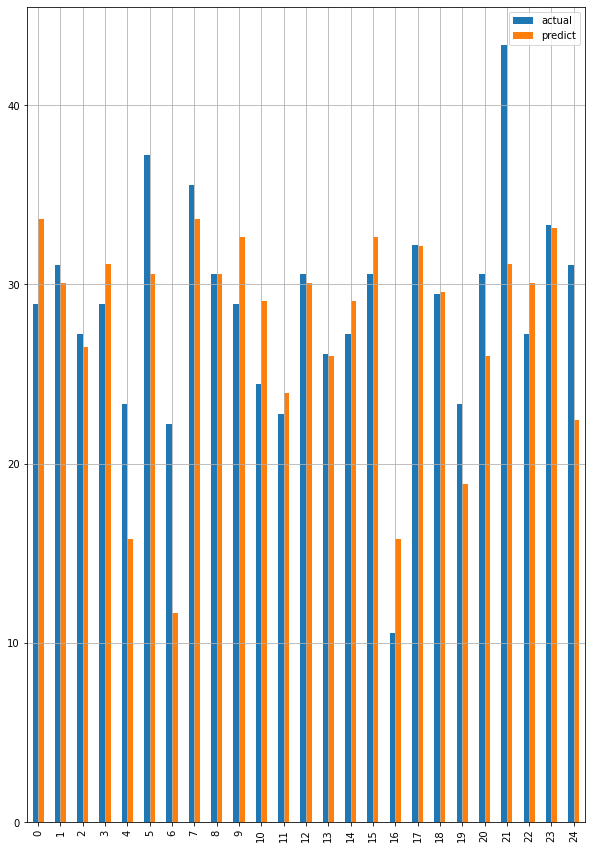

In [48]:
df2 = df1.head(25)
df2.plot(kind = 'bar', figsize=(10,15))
plt.grid()
plt.show()

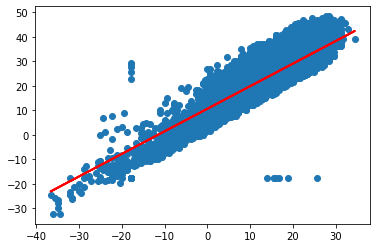

In [75]:
plt.scatter(xtest, ytest  )
plt.plot(xtest, ypred, color = 'red' , linewidth = 2)

In [52]:
metrics.mean_squared_error(ytest, ypred)

17.631568097568383

In [55]:
metrics.mean_absolute_error(ytest, ypred)

3.19932917837849

In [56]:
xm = df[['MinTemp', 'MaxTemp']].values

In [58]:
ym= df['MeanTemp'].values

In [60]:
xmtrain,xmtest,ymtrain,ymtest= train_test_split(xm , ym, test_size=0.2, random_state= 0)

In [61]:
regressor = LinearRegression()

In [62]:
regressor.fit(xmtrain,ymtrain)

LinearRegression()

In [63]:
regressor.coef_

array([0.49874453, 0.50343945])

In [64]:
ympred = regressor.predict(xmtest)

In [66]:
dfm = pd.DataFrame({
           'actual': ymtest.flatten(),
            'predict' : ympred.flatten()
})

In [67]:
dfm

,actual,predict
0,27.222222,26.935875
1,26.111111,26.115067
2,22.222222,22.217685
3,25.555556,25.550473
4,14.444444,14.441178
...,...,...
23803,27.777778,28.062454
23804,26.111111,26.120284
23805,27.777778,27.500468
23806,26.666667,26.392147


In [68]:
df2m = dfm.head(25)

In [71]:
df2m

,actual,predict
0,27.222222,26.935875
1,26.111111,26.115067
2,22.222222,22.217685
3,25.555556,25.550473
4,14.444444,14.441178
5,29.444444,29.468722
6,11.666667,11.665159
7,30.000000,30.292138
8,26.111111,26.112459
9,26.666667,26.381714


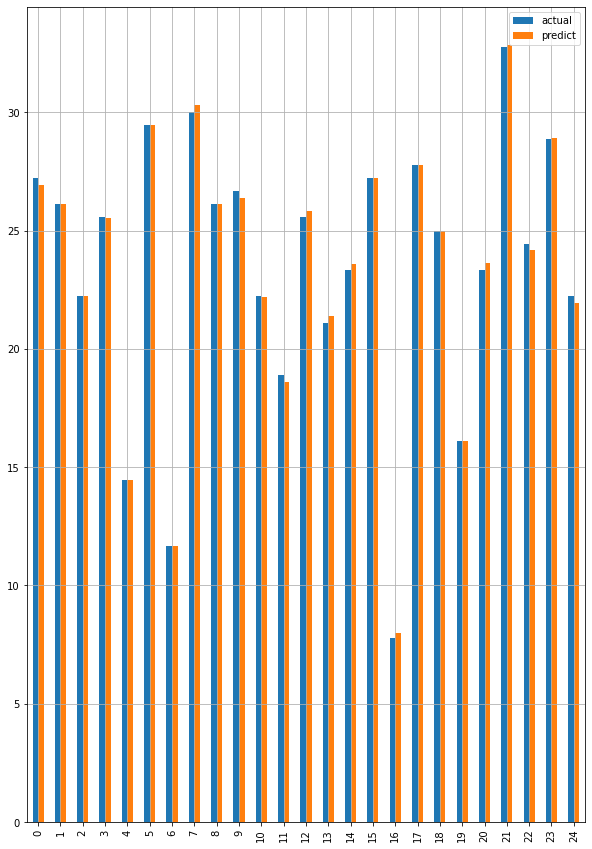

In [72]:
df2m.plot(kind ='bar', figsize = (10,15))
plt.grid()
plt.show()

In [73]:
metrics.mean_squared_error(ymtest, ympred)

0.24656329584314565